# Homework 1
## 1
### Random walk performed by a single agent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy 
import pylab 
import seaborn as sns
import random 
import matplotlib.patches as mpatches
import math

<IPython.core.display.Javascript object>


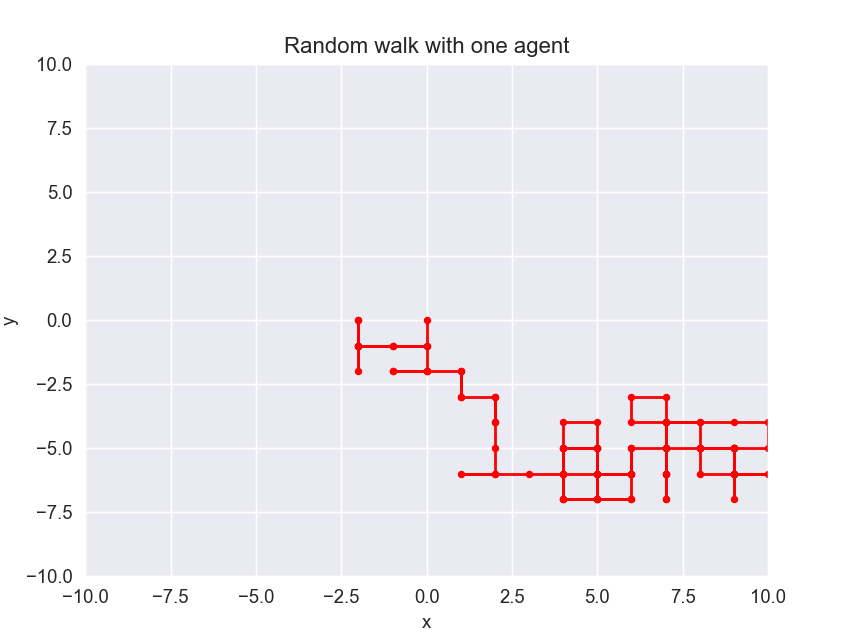

In [12]:
%matplotlib notebook

#set parameters
number_of_iterations = 100
diffusion_rate = 1

lattice_size=[-10,10]
 
x = np.zeros(number_of_iterations)
y = np.zeros(number_of_iterations)


for i in range(number_of_iterations-1):
    rand = np.random.random(1)

    if rand < diffusion_rate:

        randi = random.randint(1, 4) 
        if randi == 1: 
            x[i+1] = x[i]+1
            y[i+1] = y[i] 
        elif randi == 2: 
            x[i+1] = x[i]-1
            y[i+1] = y[i] 
        elif randi == 3: 
            x[i+1] = x[i] 
            y[i+1] = y[i]+1
        else: 
            x[i+1] = x[i] 
            y[i+1] = y[i]-1

    else: 
        x[i+1] = x[i]
        y[i+1] = y[i]
        
sns.set_style("darkgrid")
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,.8,.8])
ax.clear()
ax.set_ylim(lattice_size[0], lattice_size[1]) 
ax.set_xlim(lattice_size[0], lattice_size[1]) 
ax.plot(x,y,'.r-')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Random walk with one agent')
fig.show()


### Modelling disease spreading with a small number of agents

In [34]:
%matplotlib notebook


def disease_model(n_people, n_iterations, lattice_size, initial_infection,diffusion_rate,p_infection,p_recovery):

    #Initiate the positions and disease status
    x = np.random.randint(0,lattice_size, size=n_people) 
    y = np.random.randint(0,lattice_size, size=n_people) 
    z = np.zeros(n_people)

    # All individual inside this area is infected
    boundrary = math.sqrt(lattice_size*lattice_size*initial_infection)
    a = lattice_size/2 - boundrary/2
    b = lattice_size/2 + boundrary/2
    for i in range(n_people):
        if x[i] < b and x[i] > a and y[i]< b and y[i] > a:
            z[i] = 1

    matrix = np.zeros([n_people,3])   
    number_immune = []
    number_susceptible = []
    number_infected = []

    iterations = []
    for it in range(n_iterations):
        iterations.append(it)

        #Random walk - update the all positions 
        for i in range(n_people):
            rand = np.random.random(1)

            if rand < diffusion_rate:  
                randi = random.randint(1, 4) 
                if randi == 1: 
                    x[i] = x[i] + 1
                    y[i] = y[i] 
                elif randi == 2: 
                    x[i] = x[i] - 1
                    y[i] = y[i] 
                elif randi == 3: 
                    x[i] = x[i] 
                    y[i] = y[i] + 1
                else: 
                    x[i] = x[i] 
                    y[i] = y[i] - 1
            else:
                x[i] = x[i]
                y[i] = y[i]

            matrix[i][:] = [x[i],y[i],z[i]]


        for i in range(n_people):

            if z[i] == 1:
                # Infecting susceptibles with a given probability
                true_false_matrix = [matrix==[x[i],y[i],0]]
                random_number = np.random.random(1)

                if random_number < p_infection:
                    just_contaminated_individual = []
                    contamination = true_false_matrix[0].all(axis=1)

                    if not np.where(contamination)[0].size == 0:
                        just_contaminated_individual.append(np.where(contamination)[0])

                    if len(just_contaminated_individual)>0:
                        for ind in just_contaminated_individual[0]:
                            z[ind] = 1

                #Recovery with a given probability
                random_number = np.random.random(1)
                if random_number < p_recovery:
                    z[i] = -1
            
            matrix[i][:] = [x[i],y[i],z[i]]

        number_susceptible.append((z == 0).sum())
        number_infected.append((z == 1).sum())
        number_immune.append((z == -1).sum())

        if it == 99:
            it_100 = it
            x_100 = x.copy()
            y_100 = y.copy()
            z_100 = z.copy()

            colors_100 = ['red' if label==1 else 'green' if label== -1 else 'blue' for label in z_100]

    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(10,5))
    fig.tight_layout()
    plt.rcParams.update({'font.size': 14})

    ax1 = fig.add_subplot(121)
    ax1.clear()
    ax1.set_ylim(0, lattice_size) 
    ax1.set_xlim(0, lattice_size) 
    ax1.scatter(x_100, y_100, c=colors_100)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title(f'Iteration = {iterations[it_100]+1}, Number of agents = {n_people}')

    ax2 = fig.add_subplot(122)
    ax2.plot(iterations, number_susceptible, c='blue')
    ax2.plot(iterations, number_infected, c='red')
    ax2.plot(iterations, number_immune, c='green')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Number of agents')
    ax2.set_title(f" beta ={p_infection}, gamma={p_recovery}, \n d={diffusion_rate}")

    fig.show()


### A model with a small number of agents

<IPython.core.display.Javascript object>


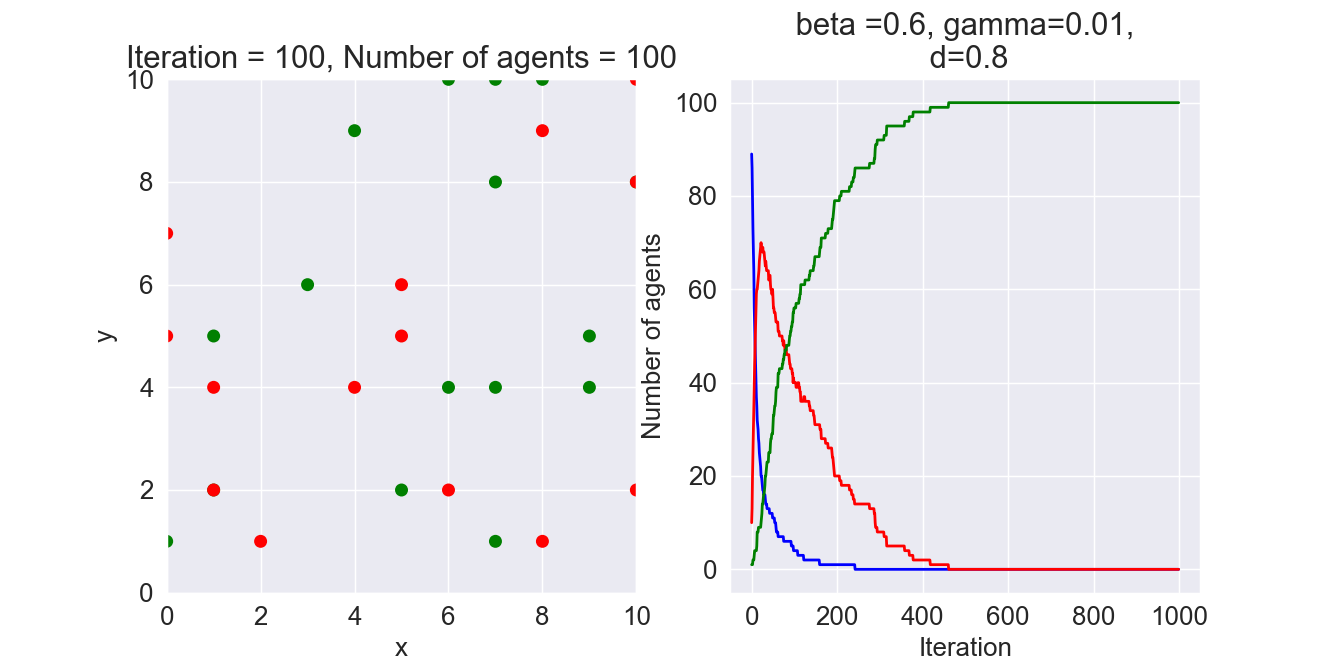

In [36]:
n_people = 100
n_iterations = 1000
diffusion_rate = 0.8
p_recovery = 0.01
p_infection = 0.6
lattice_size = 10
initial_infection=0.1

disease_model(n_people, n_iterations, lattice_size, initial_infection,diffusion_rate,p_infection,p_recovery)

### A model with 1000 agents on a 100x100 grid

<IPython.core.display.Javascript object>


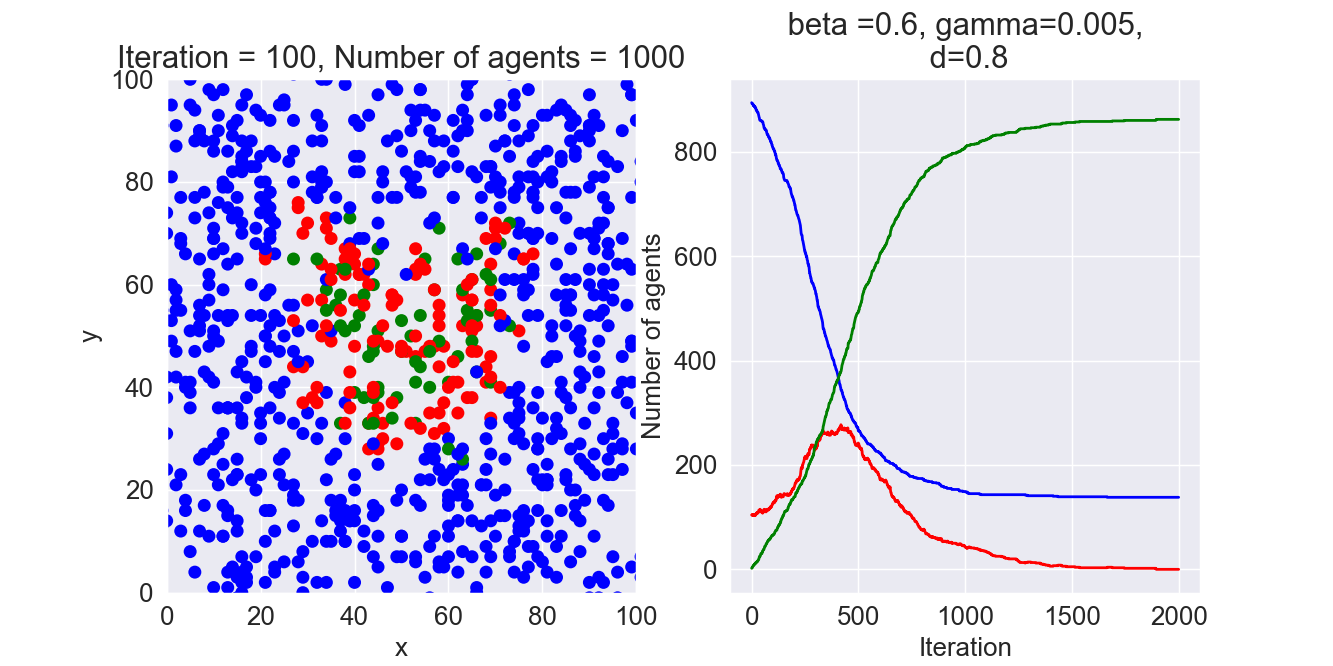

In [40]:
n_people = 1000
n_iterations = 2000
diffusion_rate = 0.8
p_recovery = 0.005
p_infection = 0.6
lattice_size = 100
initial_infection=0.1

disease_model(n_people, n_iterations, lattice_size, initial_infection,diffusion_rate,p_infection,p_recovery)

## 2
### Wide spreading disease

<IPython.core.display.Javascript object>


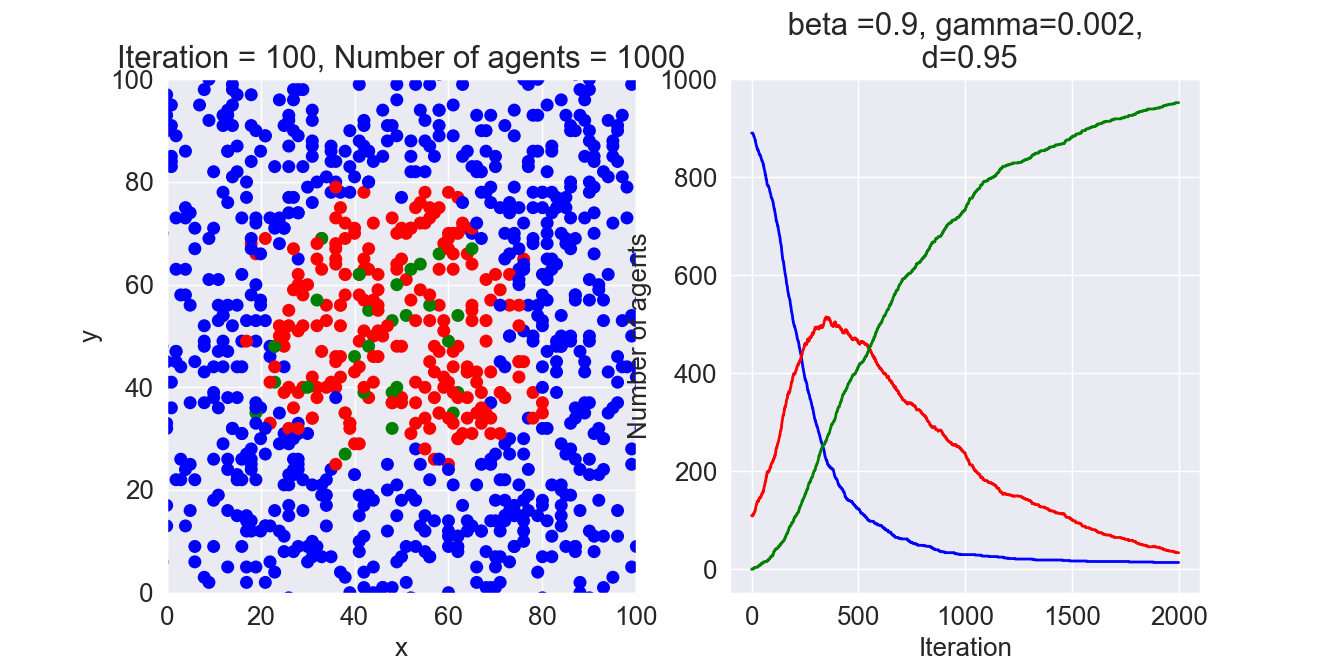

In [38]:
n_people = 1000
n_iterations = 2000
diffusion_rate = 0.95
p_recovery = 0.002
p_infection = 0.9
lattice_size = 100
initial_infection=0.1

disease_model(n_people, n_iterations, lattice_size, initial_infection,diffusion_rate,p_infection,p_recovery)

## Limited disease spreading

<IPython.core.display.Javascript object>


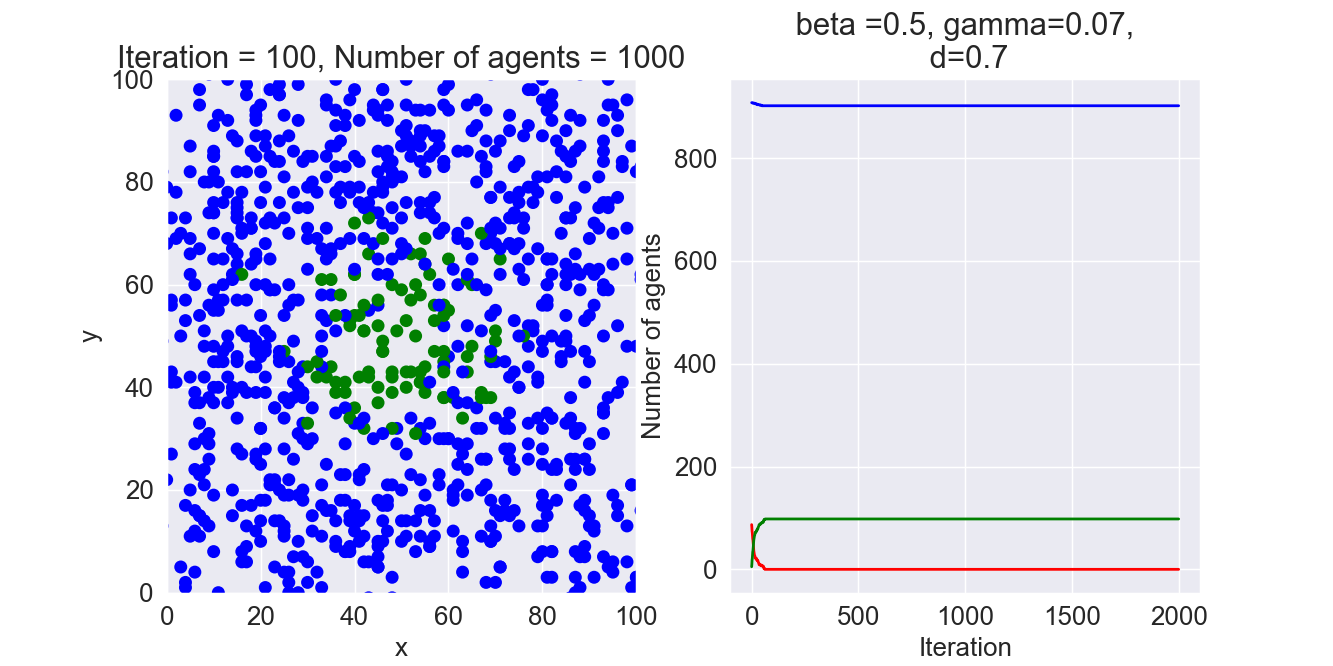

In [39]:
n_people = 1000
n_iterations = 2000
diffusion_rate = 0.7
p_recovery = 0.07
p_infection = 0.5
lattice_size = 100
initial_infection=0.1

disease_model(n_people, n_iterations, lattice_size, initial_infection,diffusion_rate,p_infection,p_recovery)